Random seed used: 5300


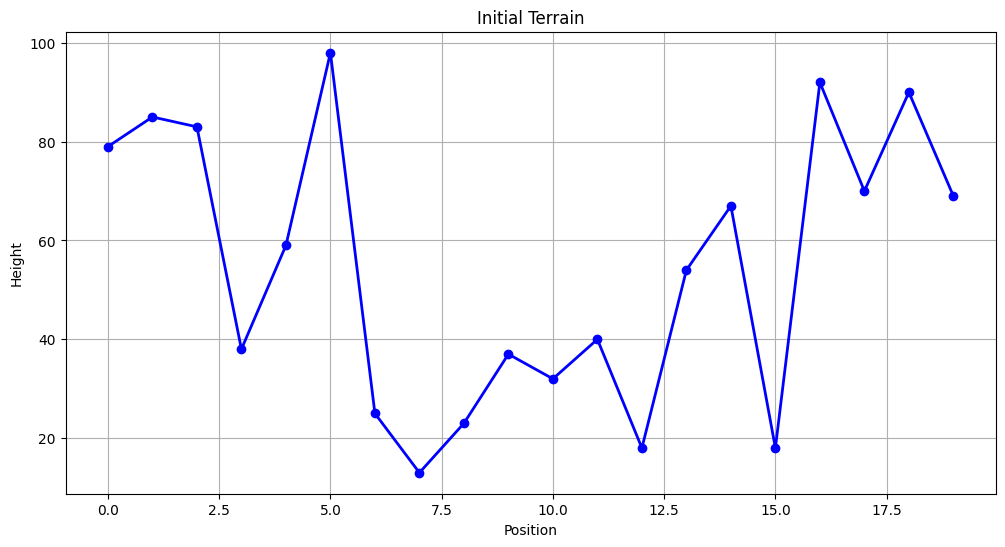

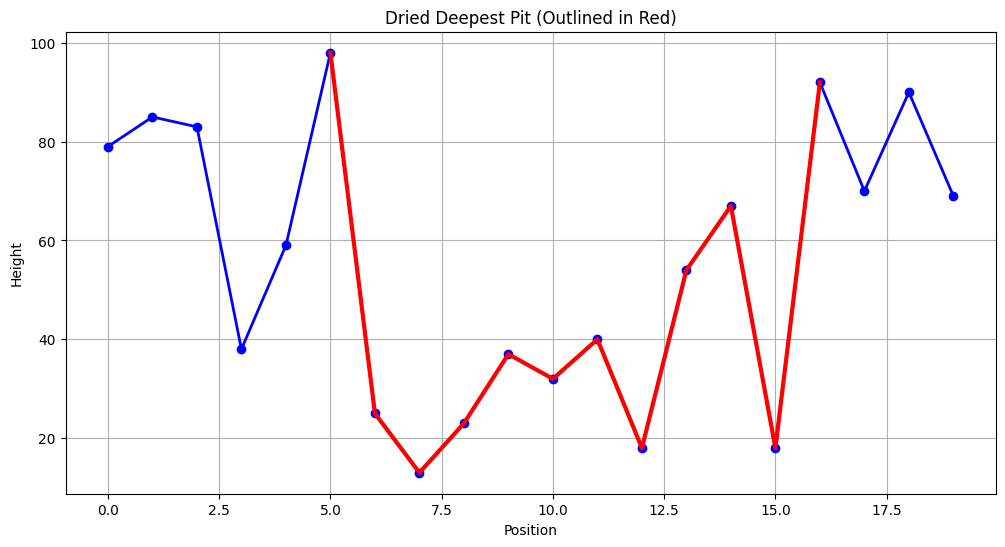

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random seed (Optional)
seed = np.random.randint(0, 10000)
np.random.seed(seed)
print(f"Random seed used: {seed}")


# Generate 20 random mountain heights between 1 and 100
heights = np.random.randint(1, 101, 20)
x_values = np.arange(len(heights))

# Compute left and right max heights for water trapping
n = len(heights)
left_max = [0] * n
right_max = [0] * n
water = [0] * n

left_max[0] = heights[0]
for i in range(1, n):
    left_max[i] = max(left_max[i - 1], heights[i])

right_max[n - 1] = heights[n - 1]
for i in range(n - 2, -1, -1):
    right_max[i] = max(right_max[i + 1], heights[i])

# Find trapped water at each terrain position
for i in range(n):
    water[i] = max(0, min(left_max[i], right_max[i]) - heights[i])

# Find the deepest lake
deepest_lake_depth = max(water)
deepest_lake_position = water.index(deepest_lake_depth)

# Find the start and end positions of the deepest lake
deepest_lake_start = deepest_lake_position
while deepest_lake_start > 0 and water[deepest_lake_start] > 0:
    deepest_lake_start -= 1

deepest_lake_end = deepest_lake_position
while deepest_lake_end < len(water) - 1 and water[deepest_lake_end] > 0:
    deepest_lake_end += 1

# Plot initial terrain
plt.figure(figsize=(12, 6))
plt.plot(x_values, heights, marker='o', linestyle='-', color='blue', linewidth=2)
plt.title('Initial Terrain')
plt.xlabel('Position')
plt.ylabel('Height')
plt.grid(True)
plt.show()

# Plot the deepest pit outline (as if lake dried up)
plt.figure(figsize=(12, 6))
plt.plot(x_values, heights, marker='o', linestyle='-', color='blue', linewidth=2)
plt.plot(range(deepest_lake_start, deepest_lake_end + 1), 
         [heights[i] for i in range(deepest_lake_start, deepest_lake_end + 1)], 
         color='red', linewidth=3)
plt.title('Dried Deepest Pit (Outlined in Red)')
plt.xlabel('Position')
plt.ylabel('Height')
plt.grid(True)
plt.show()